In [1]:
import boto3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load AWS keys from disk
with open('../../s3-access-keys.txt', "r") as f:
    ACCESS_KEY, SECRET_KEY = f.readline().strip().split()

In [5]:
# Connect to S3
s3 = boto3.resource("s3", aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY)
bucket = s3.Bucket(name="zep-tda")

In [6]:
# Specify date
date = "2020-11-16"

In [7]:
# Load csv-files
prefix = f"experiments/rc-car/recordings/data/{date}/"

df = pd.DataFrame()

for obj in bucket.objects.filter(Prefix=prefix):
    response = obj.get()
    chunk = pd.read_csv(response['Body'], index_col=0)
    
    df = df.append(chunk)

In [8]:
df.head()

,ABS_RX,ABS_Y
2020-11-16_14-11-08-053090,0.0,0.0
2020-11-16_14-11-08-715549,0.0,0.0
2020-11-16_14-11-09-321383,0.0,0.0
2020-11-16_14-11-09-926422,0.0,0.3
2020-11-16_14-11-10-531441,0.0,0.2


In [9]:
df.shape

(28, 2)

In [10]:
df["ABS_RX"].value_counts()

0.0    27
0.6     1
Name: ABS_RX, dtype: int64

In [11]:
df["ABS_Y"].value_counts()

 0.0    17
-0.4     2
 0.3     2
 0.2     1
-0.3     1
-0.1     1
 0.6     1
 0.1     1
 0.4     1
 0.5     1
Name: ABS_Y, dtype: int64

In [16]:
#Load images
from PIL import Image
prefix = f"experiments/rc-car/recordings/images/{date}"
destination = "test-data/"

images = []
for i, obj in enumerate(bucket.objects.filter(Prefix=prefix)):
    
    # Print progress
    if i%100 == 0:
        print(i)
    
    # Download to folder
    bucket.download_file(obj.key, destination+obj.key.split("/")[-1])
    
    # Download to numpy array
    response = obj.get()
    img = Image.open(response["Body"])
    img = np.array(img)
    images.append(img)
    
images = np.asarray(images)
print(images.shape)

0
(28, 224, 224, 3)


In [17]:
# storage in mb
images.nbytes /(1024*1024)

4.01953125

### Plot pictures

In [32]:
# for i in range(5):
#     img = images[i*5]
#     plt.imshow(img)
#     plt.show()

### check data

In [43]:
# left, straight, right
tstamps = ["2020-06-16_09-09-17-717871", "2020-06-16_09-04-01-009389", "2020-06-16_16-05-04-245544"]

In [47]:
df.loc["2020-06-16_09-09-17-717871"]

dist_0    120.45
ABS_RX     -1.00
ABS_Y       0.60
Name: 2020-06-16_09-09-17-717871, dtype: float64

ABS_RX   -1.0
ABS_Y     0.6
Name: 2020-06-16_09-09-17-717871, dtype: float64


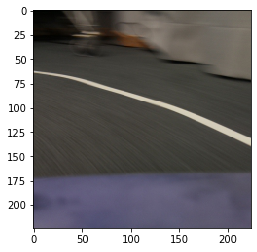

ABS_RX    0.0
ABS_Y     0.5
Name: 2020-06-16_09-04-01-009389, dtype: float64


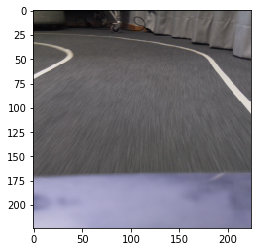

ABS_RX    1.0
ABS_Y     0.7
Name: 2020-06-16_16-05-04-245544, dtype: float64


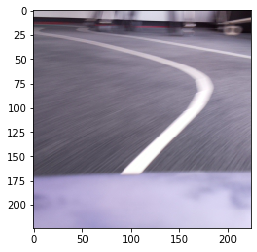

In [50]:
from keras.preprocessing import image

for t in tstamps:
    print(df.loc[t,["ABS_RX", "ABS_Y"]])
    img_path = f"/data01/nsturma/autopilot/{t}.jpg"
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.show()

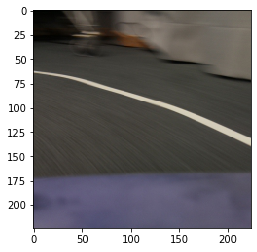

### Cut images

In [37]:
# cut them
im_small = images[:,:170,:,:]
im_small.shape

(2340, 170, 224, 3)

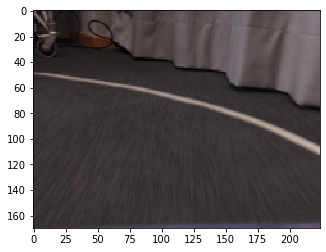

In [43]:
img = im_small[1853]
plt.imshow(img)

In [14]:
# Normalize the images to [-0.5, 0.5]
#images = (images / 255) 